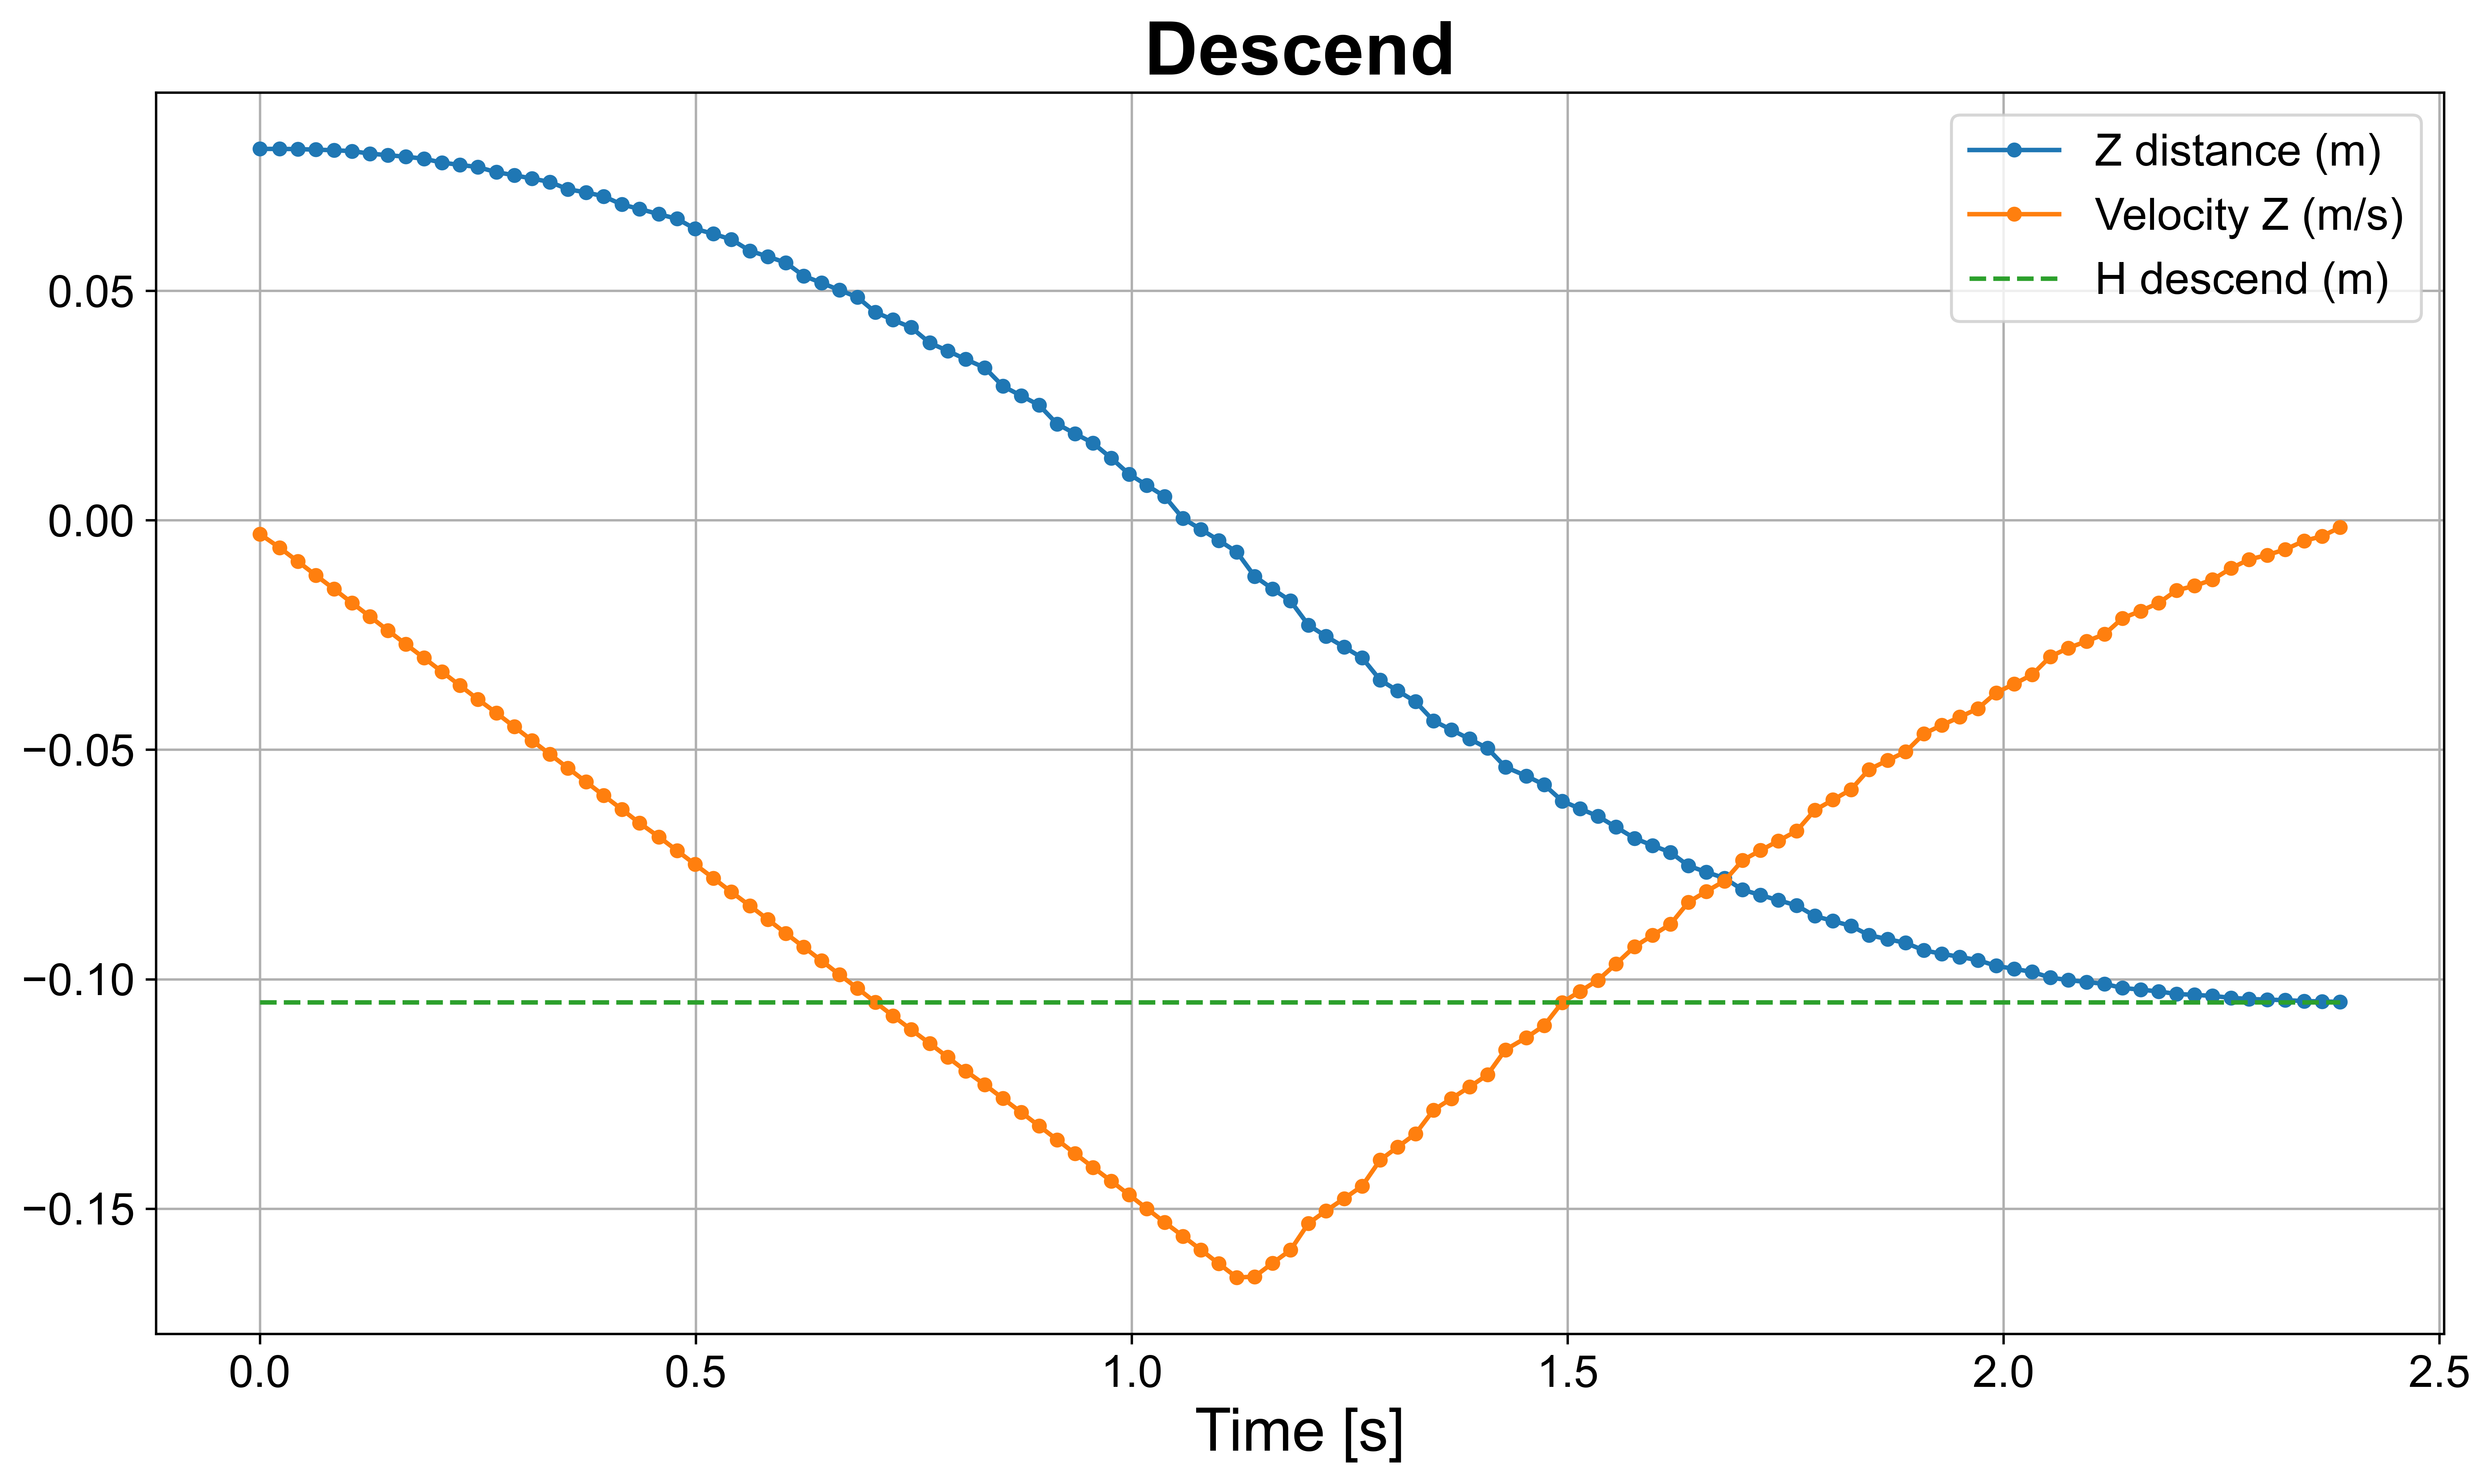

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables for font sizes and marker size
FONT_FAMILY = 'Arial'
FONT_SIZE_TITLE = 25
FONT_SIZE_LABEL = 20
FONT_SIZE_TICKS = 15
FONT_SIZE_LEGEND = 15
MARKER_SIZE = 4

# Load CSV
df = pd.read_csv("new_data_for_thesis/25Hz_descend.csv")

# Convert time to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Set font family globally
plt.rcParams.update({'font.family': FONT_FAMILY})

# Create figure with DPI 600, size fitting A4 width and moderate height
plt.figure(figsize=(11.69, 7), dpi=600)
plt.clf()

# Plot with markers
plt.plot(df["relative_time"], df["z_pos"], label="Z distance (m)", marker="o", linestyle="-", markersize=MARKER_SIZE)
plt.plot(df["relative_time"], df["z_speed"], label="Velocity Z (m/s)", marker="o", linestyle="-", markersize=MARKER_SIZE)
plt.plot(df["relative_time"], df["z_target"], label="H descend (m)", linestyle="--")

# Labels and title
plt.xlabel("Time [s]", fontsize=FONT_SIZE_LABEL)
#plt.ylabel("", fontsize=FONT_SIZE_LABEL)
plt.title("Descend", fontsize=FONT_SIZE_TITLE, fontweight='bold')

# Legend with increased font size
plt.legend(fontsize=FONT_SIZE_LEGEND)

# Increase tick label font size
plt.xticks(fontsize=FONT_SIZE_TICKS)
plt.yticks(fontsize=FONT_SIZE_TICKS)

plt.grid(True)
plt.tight_layout()
plt.show()


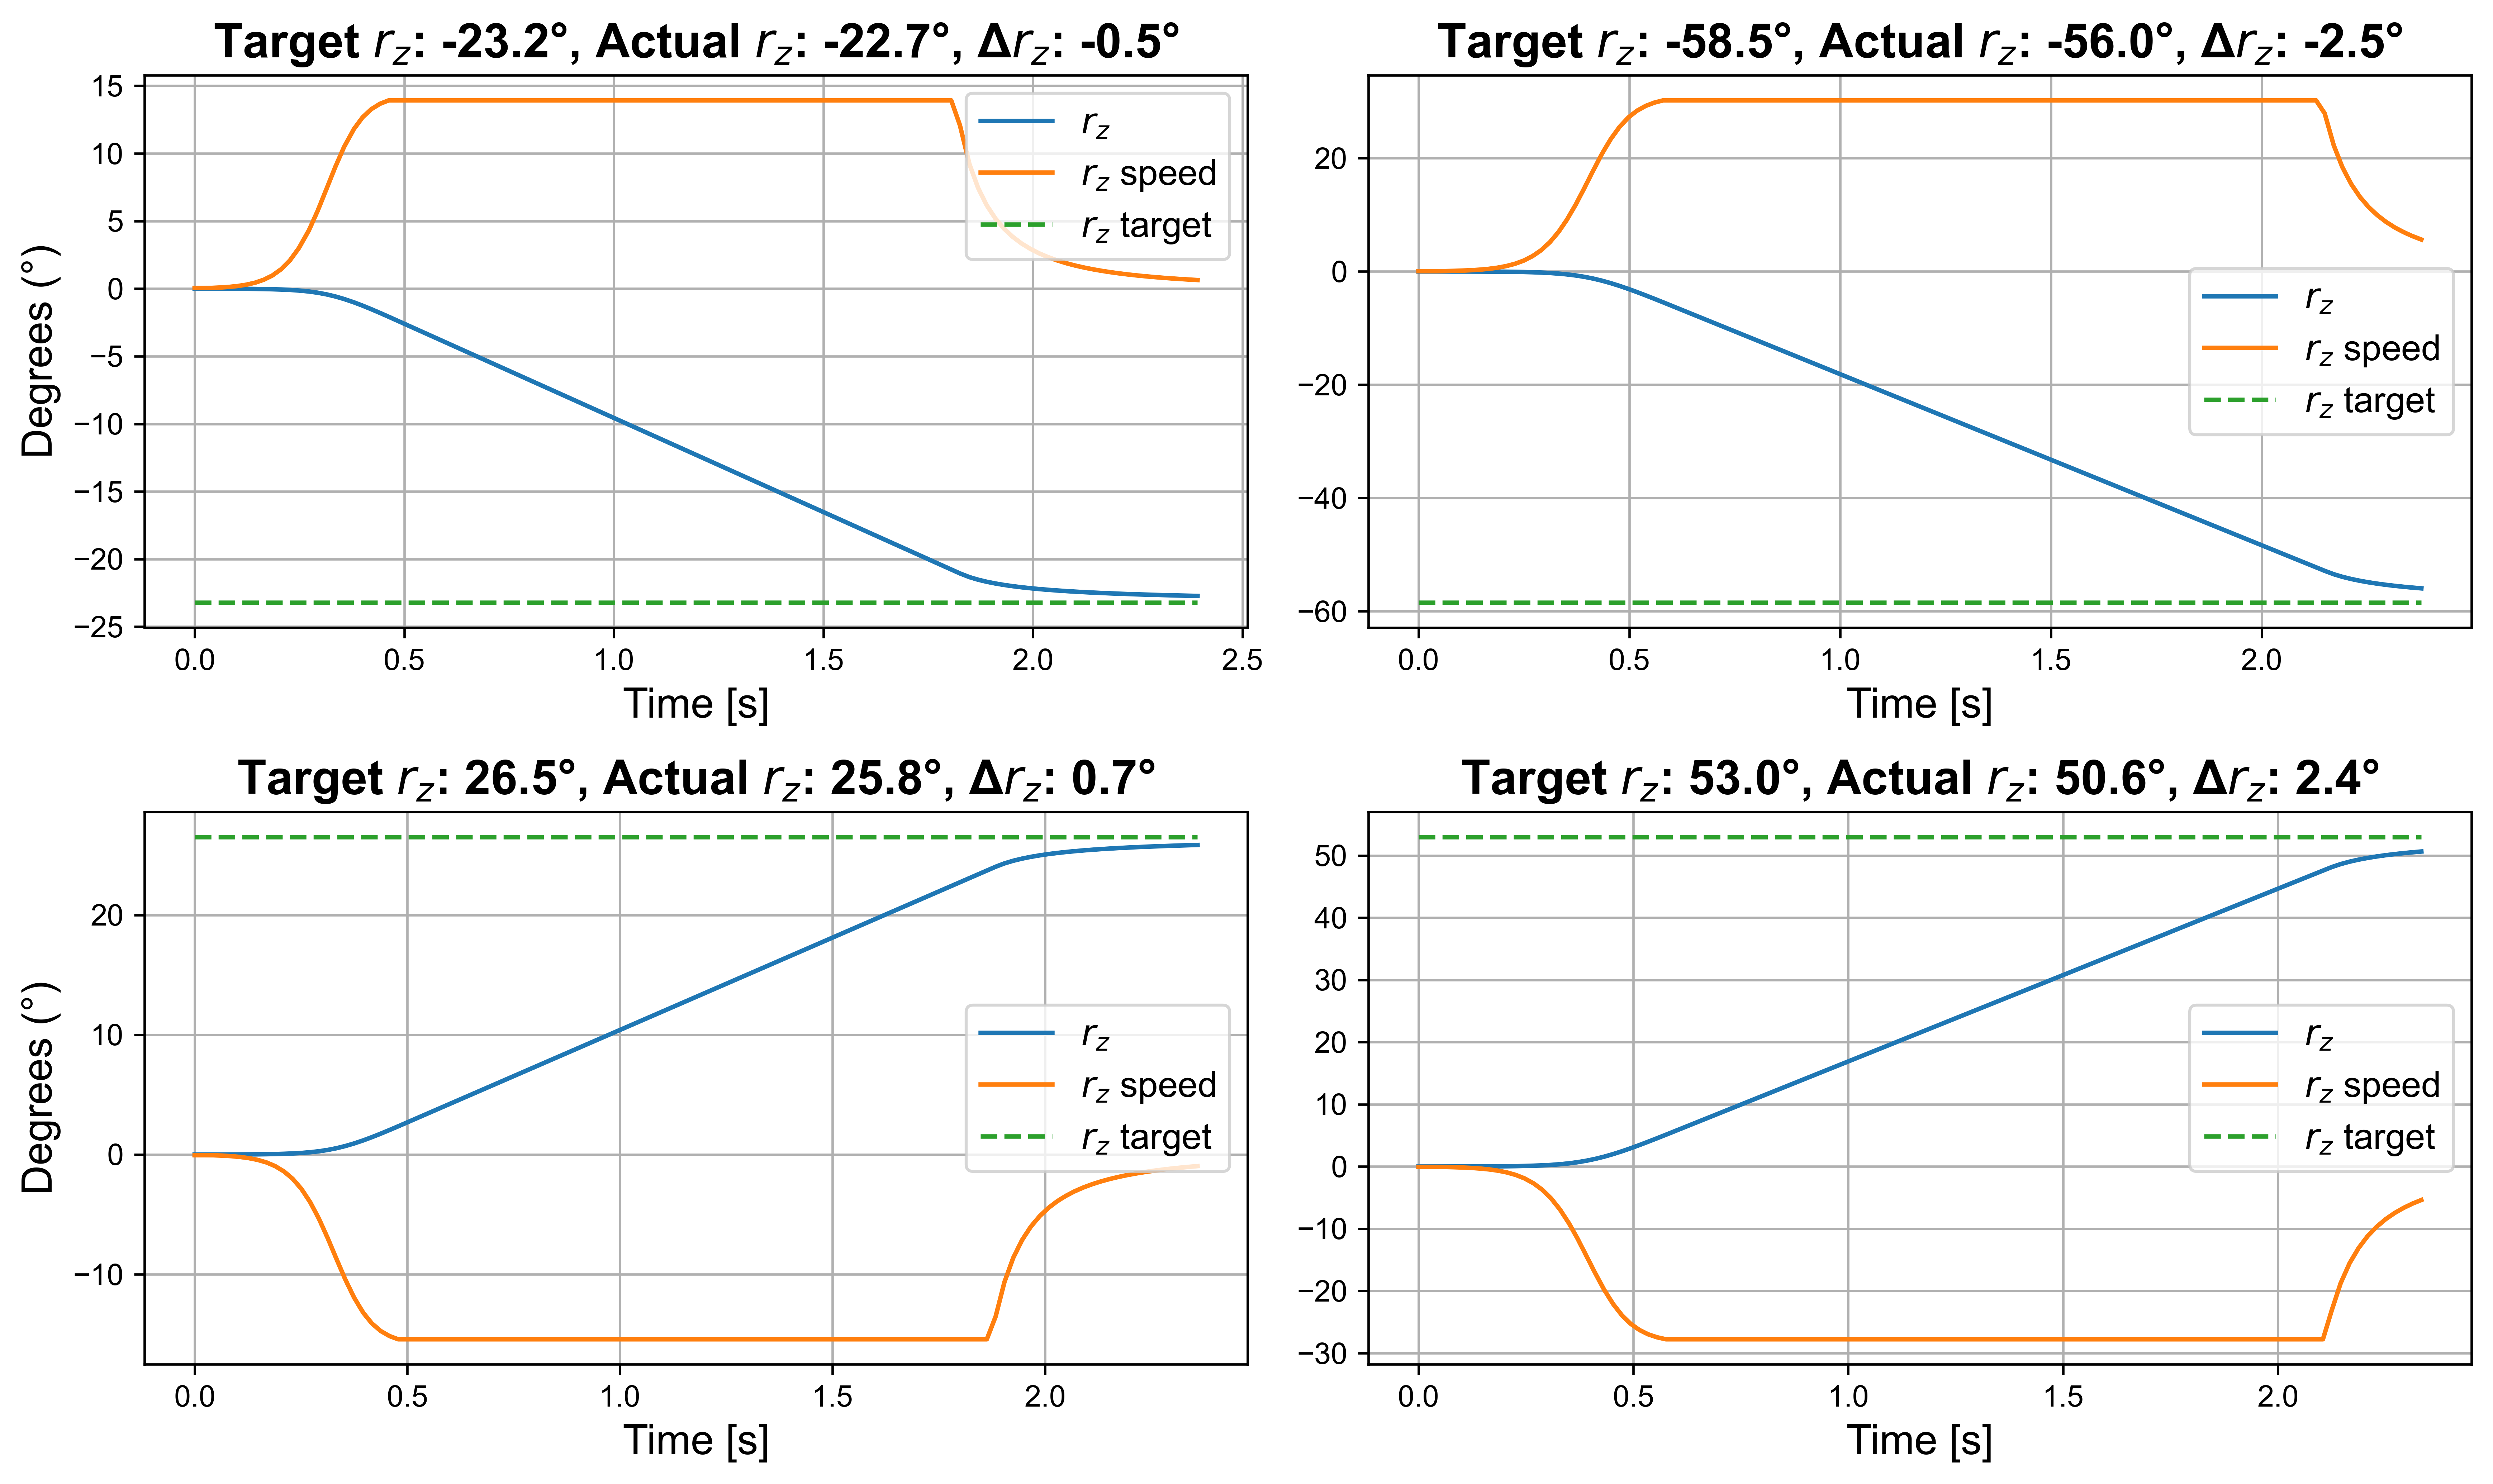

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables to adjust font sizes and marker size easily
FONT_FAMILY = 'Arial'
FONT_SIZE_TITLE = 16
FONT_SIZE_LABEL = 14
FONT_SIZE_LEGEND = 12
MARKER_SIZE = 4

# Load CSVs
plot1 = pd.read_csv("new_data_for_thesis/small_rotation.csv")
plot2 = pd.read_csv("new_data_for_thesis/medium_rotation.csv")
plot3 = pd.read_csv("new_data_for_thesis/small_negative_rotation.csv")
plot4 = pd.read_csv("new_data_for_thesis/medium_negative_rotation.csv")

def process_df(df):
    df = df.copy()
    df["relative_time"] = df["time"] - df["time"].iloc[0]
    df["rotation_deg"] = df["rotation"] * 180 / 3.14159
    df["rz_speed_deg"] = df["rz_speed"] * 180 / 3.14159
    df["rz_target_deg"] = df["rz_target"] * 180 / 3.14159
    return df

plot1 = process_df(plot1)
plot2 = process_df(plot2)
plot3 = process_df(plot3)
plot4 = process_df(plot4)

def extract_target(df):
    return round(df["rz_target_deg"].iloc[0], 1)

targets_deg = [extract_target(df) for df in [plot1, plot2, plot3, plot4]]

def extract_final_rotation_and_diff(df, target_deg):
    actual_deg = round(df["rotation_deg"].iloc[-1], 1)
    difference = round(target_deg - actual_deg, 1)
    return actual_deg, difference

final_rotations_diffs = [extract_final_rotation_and_diff(df, tgt) for df, tgt in zip([plot1, plot2, plot3, plot4], targets_deg)]

# Adjusted figure size: wider and less tall (fits A4 width better)
fig, axs = plt.subplots(2, 2, figsize=(11.69, 7), dpi=600)  # A4 width x shorter height

fig.subplots_adjust(hspace=0.35, wspace=0.3)

plots = [[plot1, plot2], [plot3, plot4]]
titles = [["Small Rotation", "Medium Rotation"], ["Small Negative Rotation", "Medium Negative Rotation"]]

plt.rcParams.update({'font.family': FONT_FAMILY})

for row in range(2):
    for col in range(2):
        ax = axs[row, col]
        data = plots[row][col]
        target_deg = targets_deg[row*2 + col]
        actual_deg, diff = final_rotations_diffs[row*2 + col]
        title = (f"Target $r_z$: {target_deg}°, "
                 f"Actual $r_z$: {actual_deg}°, Δ$r_z$: {diff}°")
        
        ax.plot(data["relative_time"], data["rotation_deg"], label="$r_z$", color='tab:blue', markersize=MARKER_SIZE)
        ax.plot(data["relative_time"], data["rz_speed_deg"], label="$r_z$ speed", color='tab:orange', markersize=MARKER_SIZE)
        ax.plot(data["relative_time"], data["rz_target_deg"], label="$r_z$ target", color='tab:green', linestyle="--", markersize=MARKER_SIZE)
        ax.set_title(title, fontsize=FONT_SIZE_TITLE, fontweight='bold')
        ax.set_xlabel("Time [s]", fontsize=FONT_SIZE_LABEL)
        ax.grid(True)
        ax.legend(fontsize=FONT_SIZE_LEGEND)
        if col == 0:
            ax.set_ylabel("Degrees (°)", fontsize=FONT_SIZE_LABEL)

plt.tight_layout()
plt.show()


In [27]:
fig.savefig("descend_plots.pdf", bbox_inches='tight')